**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [12]:
import numpy as np

In [3]:
print(np.__version__)

1.14.5


In [4]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [5]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [6]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [2]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [23]:
normal_interval = proportion_confint(104, 11037, method = 'normal')

In [24]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.007620, 0.011225] with width 0.003605


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [21]:
wilson_interval = proportion_confint(104, 11037, method = 'wilson')

In [22]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.007783, 0.011404] with width 0.003620


## Размер выборки для интервала заданной ширины

In [10]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [13]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples
samplesize_confint_proportion

753

In [15]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [16]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [17]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


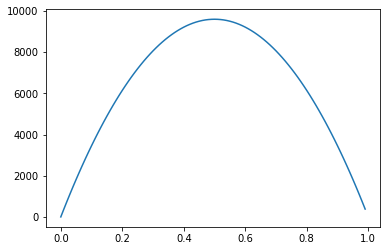

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

p = np.arange(0,1,0.01)
n_samples = []
for i in p:
    n_samples.append(int(np.ceil(samplesize_confint_proportion(i, 0.01))))
plt.plot(p,n_samples)
    

In [20]:
print(sorted(n_samples))

[0, 381, 381, 753, 753, 1118, 1118, 1476, 1476, 1825, 1825, 2167, 2167, 2501, 2501, 2828, 2828, 3147, 3147, 3458, 3458, 3761, 3761, 4057, 4057, 4345, 4345, 4626, 4626, 4898, 4898, 5163, 5163, 5421, 5421, 5670, 5670, 5913, 5913, 6147, 6147, 6373, 6373, 6592, 6592, 6804, 6804, 7007, 7007, 7203, 7203, 7391, 7391, 7572, 7572, 7745, 7745, 7910, 7910, 8068, 8068, 8217, 8217, 8360, 8360, 8494, 8494, 8621, 8621, 8740, 8740, 8851, 8851, 8955, 8955, 9051, 9051, 9139, 9139, 9220, 9220, 9293, 9293, 9358, 9358, 9416, 9416, 9466, 9466, 9508, 9508, 9543, 9543, 9570, 9570, 9589, 9589, 9600, 9600, 9604]
